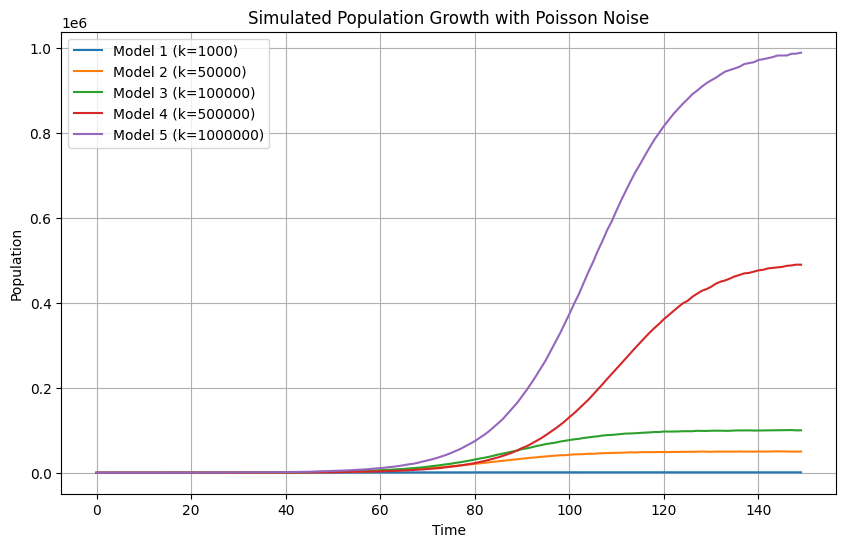

In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import pandas as pd

def growthEQ(t, y):
    r = 0.1
    return r*y*(1 - (y/carrying_cap))

num_of_models = 5
time = 150
states = [5, 12, 15, 8, 27]
k_vals = [1000, 50_000, 100_000, 500_000, 1_000_000]
data = np.empty([5, time])


for i in range(num_of_models):
    if len(states) != num_of_models or len(k_vals) != num_of_models:
        print("Either initial states or k_vals does not equal the number of models.")
        exit()

    init_state = [states[i]]
    carrying_cap = k_vals[i]
    sol = solve_ivp(fun=growthEQ, 
                    t_span=[0, time], 
                    y0=init_state, 
                    t_eval=range(time))
    data[i] = np.random.poisson(sol.y[0])


# Save to CSV
file_path = '../datasets/resample_experiment_time_series.csv'
df = pd.DataFrame(data.T, columns=[f'Model {i+1} (k={k})' for i, k in enumerate(k_vals)])
df.to_csv(file_path, index=False)


# Create plot for data 
plt.figure(figsize=(10, 6))
for i in range(num_of_models):
    plt.plot(np.arange(time), data[i], label=f'Model {i+1} (k={k_vals[i]})')

plt.title('Simulated Population Growth with Poisson Noise')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.show()

## Increasing the rate

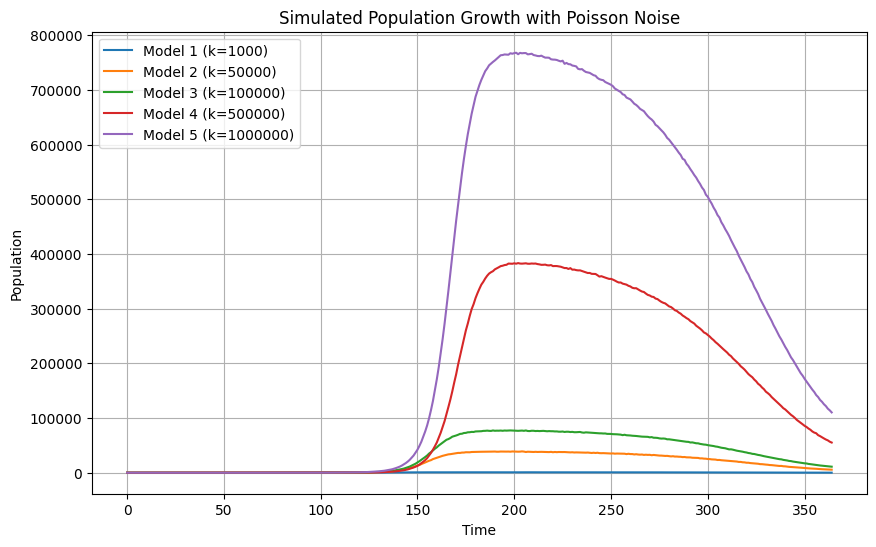

In [5]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import pandas as pd


d=365
t=np.linspace(0,2*d,2*d+1)
def effBeta(t):
    return 0.1*(1.2-np.cos(t/d*2*np.pi))


def growthEQ(t, y):
    r = effBeta(t)
    mu = 0.05
    return r*y*(1 - (y/carrying_cap)) - mu*y

num_of_models = 5
time = 365
states = [5, 12, 15, 8, 27]
k_vals = [1000, 50_000, 100_000, 500_000, 1_000_000]
data = np.empty([num_of_models, time])


for i in range(num_of_models):
    if len(states) != num_of_models or len(k_vals) != num_of_models:
        print("Either initial states or k_vals does not equal the number of models.")
        exit()

    init_state = [states[i]]
    carrying_cap = k_vals[i]
    sol = solve_ivp(fun=growthEQ, 
                    t_span=[0, time], 
                    y0=init_state, 
                    t_eval=range(time))
    data[i] = np.random.poisson(sol.y[0])


# Save to CSV
file_path = '../datasets/resample_experiment_time_series.csv'
df = pd.DataFrame(data.T, columns=[f'Model {i+1} (k={k})' for i, k in enumerate(k_vals)])
df.to_csv(file_path, index=False)


# Create plot for data 
plt.figure(figsize=(10, 6))
for i in range(num_of_models):
    plt.plot(np.arange(time), data[i], label=f'Model {i+1} (k={k_vals[i]})')

plt.title('Simulated Population Growth with Poisson Noise')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
'''Entry point for the particle filtering code '''

import sys
sys.path.append('../')
import numpy as np

from Implementations.algorithms.TimeDependentBeta import TimeDependentAlgo
from Implementations.algorithms.Experiment import ExperimentAlgo
from Implementations.resamplers.resamplers import PoissonResample,NBinomResample, LogNBinomResampleExperiment
from Implementations.solvers.DeterministicSolvers import LSODACalvettiSolver,LSODASolver,LSODASolverSEIARHD, EulerSolverExperiment
from Implementations.perturbers.perturbers import MultivariatePerturbations
from utilities.Utils import Context,ESTIMATION
from functools import partial


'''Algorithm object encapsulating all the requirements

The integrator is an object which runs the t->t+1 propagation of the particles, primarily using the LSODA 
integrator built in to scipy.integrate(solve_ivp)

The perturb object performs multivariate perturbations on the state variables and the estimated variables

The resampler computes the weights and resamples based on a known algorithm(multinomial,systematic,residual)



'''
algo = ExperimentAlgo(integrator = EulerSolverExperiment(),
                        perturb = MultivariatePerturbations(hyper_params={"h":0.5,"sigma1":0.05,"sigma2":0.1}),
                        resampler = LogNBinomResampleExperiment(),
                        ctx=Context(population=30,
                                    state_size = 5,
                                    weights=np.zeros(1000),
                                    seed_loc=[0,1,2,3,4],
                                    seed_size=100,
                                    forward_estimation=1,
                                    rng=np.random.default_rng(),
                        particle_count=1000))

algo.initialize(params={
"r": ESTIMATION.VARIABLE,
"k": ESTIMATION.STATIC_PER_LOCATION,
"mu": 0.05,
"R": 50
}
,priors={
"r": partial(algo.ctx.rng.uniform, 0.1, 0.6),
"k": partial(algo.ctx.rng.uniform, 1000, 100000),
"mu": partial(algo.ctx.rng.uniform, 0, 1)
})

'''Runs the PF over the specified data set for the specified length of time'''
algo.run(f'../datasets/resample_experiment_time_series.csv',365)



Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
Iteration: 21
Iteration: 22
Iteration: 23
Iteration: 24
Iteration: 25
Iteration: 26
Iteration: 27
Iteration: 28
Iteration: 29
Iteration: 30
Iteration: 31
Iteration: 32
Iteration: 33
Iteration: 34
Iteration: 35
Iteration: 36
Iteration: 37
Iteration: 38
Iteration: 39
Iteration: 40
Iteration: 41
Iteration: 42
Iteration: 43
Iteration: 44
Iteration: 45
Iteration: 46
Iteration: 47
Iteration: 48
Iteration: 49
Iteration: 50
Iteration: 51
Iteration: 52
Iteration: 53
Iteration: 54
Iteration: 55
Iteration: 56
Iteration: 57
Iteration: 58
Iteration: 59
Iteration: 60
Iteration: 61
Iteration: 62
Iteration: 63
Iteration: 64
Iteration: 65
Iteration: 66
Iteration: 67
Iteration: 68
Iteration: 69
Iteration: 70
Iteration: 71
It

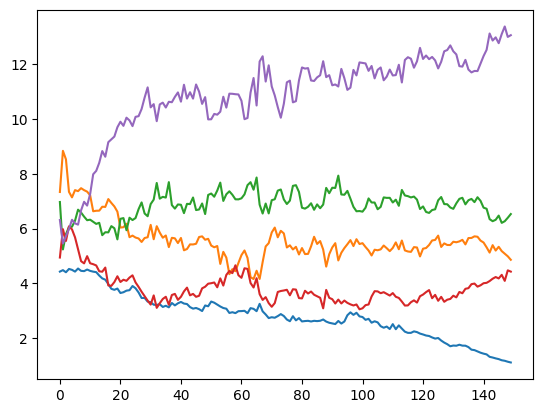

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

pf_state = pd.read_csv('../datasets/state_quantiles.csv').to_numpy()
pf_state = np.delete(pf_state,0,1)

plt.plot(pf_state)